In [1]:
import pandas as pd
import sqlite3
import requests
import numpy as np
import folium
import folium.plugins 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
con = sqlite3.connect('Campsite_data_4k-all.db')
query = ''' SELECT * FROM Venues'''
completed_venues = pd.read_sql_query(query,con).drop('index',axis=1)
query = ''' SELECT Campsite_Name, Latitude, Longitude FROM Sites WHERE Campsite_Name not like '%closed%'   '''
df_RV = pd.read_sql_query(query,con).drop_duplicates()
con.close()
Camp_sites_onehot = pd.get_dummies(completed_venues[['Venue_Category']], prefix="", prefix_sep="")
Camp_sites_onehot['Latitude'] = completed_venues['Latitude']
Camp_sites_onehot = Camp_sites_onehot[[Camp_sites_onehot.columns[-1]] + list(Camp_sites_onehot.columns[:-1])]
campsite_grouped = Camp_sites_onehot.groupby('Latitude').mean().reset_index()
campsite_grouped_clustering = campsite_grouped.drop('Latitude', 1)
campsite_grouped

,Latitude,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,...,Well,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,19.136683,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.501292,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19.734633,0.0,0.0,0.0,0.0,0.0,0.016667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.026883,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.071786,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9040,64.962006,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9041,64.997376,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9042,65.053898,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9043,65.825600,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_RV

,Campsite_Name,Latitude,Longitude
0,'KSAN Historical Village Campground,55.249428,-127.679933
1,10 Acres Campground and RV Park,44.030277,-73.403468
2,1000 Islands Campground,44.276788,-75.997158
3,1000 Islands Camping Resort,44.350050,-76.054170
4,1000 Islands/Association Island K O A,43.891877,-76.216943
...,...,...,...
16972,Zippel Bay SP,48.847923,-94.849806
16973,Zooland Family Campground,35.603549,-79.850677
16974,Zumbro Bottoms Horse Campground,44.301126,-92.122085
16975,Zuni Village RV Park,35.224768,-114.014515


In [4]:
result_ss = []


range_for_test = list(range(4,20))

# run k-means clustering
for k in range_for_test:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(campsite_grouped_clustering)
    result_ss.append(kmeans.inertia_)

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [41]:
start = range_for_test[0]
range_test_stats = []
for instance in result_ss:
    temp = {}
    temp['Clusters'] = start 
    temp['SSD'] = instance
    range_test_stats.append(temp)
    start = start +1
df_range_test_stats = pd.DataFrame(range_test_stats)

In [46]:
con = sqlite3.connect('Campsite_data_4k-all.db')
df_range_test_stats.to_sql('KmeansE',con,if_exists='replace')
con.close()

In [47]:
con = sqlite3.connect('Campsite_data_4k-all.db')
query = ''' SELECT * FROM KmeansE'''
df_Kmeans_enqurie = pd.read_sql_query(query,con)
con.close()
df_Kmeans_enqurie

,index,Clusters,SSD
0,0,4,1662.215050
1,1,5,1611.477239
2,2,6,1563.050478
3,3,7,1554.739645
4,4,8,1524.455815
5,5,9,1485.245727
6,6,10,1463.094213
7,7,11,1444.525476
8,8,12,1425.820944
9,9,13,1401.652847


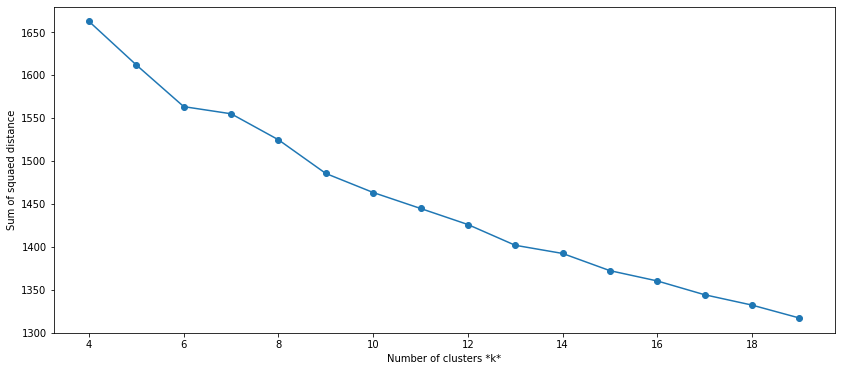

In [18]:
plt.figure(figsize=(14,6))
plt.plot(range_for_test,result_ss, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squaed distance')
plt.savefig('Kmeans_elbow.png',dpi=300)
plt.show()

In [6]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(campsite_grouped_clustering)

In [7]:
kmeans.labels_[0:30]

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
campsite_grouped.insert(0, 'Kmeans_Cluster_Labels', kmeans.labels_)
df_RV = df_RV.reset_index().set_index('Latitude')
campsite_grouped = campsite_grouped.set_index('Latitude')

In [9]:
df_RV['Kmeans_Cluster_Labels'] = campsite_grouped['Kmeans_Cluster_Labels']
df_RV = df_RV.reset_index()
df_RV

,Latitude,index,Campsite_Name,Longitude,Kmeans_Cluster_Labels
0,55.249428,0,'KSAN Historical Village Campground,-127.679933,1.0
1,44.030277,1,10 Acres Campground and RV Park,-73.403468,1.0
2,44.276788,2,1000 Islands Campground,-75.997158,1.0
3,44.350050,3,1000 Islands Camping Resort,-76.054170,0.0
4,43.891877,4,1000 Islands/Association Island K O A,-76.216943,1.0
...,...,...,...,...,...
16971,48.847923,16972,Zippel Bay SP,-94.849806,NaN
16972,35.603549,16973,Zooland Family Campground,-79.850677,NaN
16973,44.301126,16974,Zumbro Bottoms Horse Campground,-92.122085,NaN
16974,35.224768,16975,Zuni Village RV Park,-114.014515,NaN


In [10]:
df_RV.groupby('Kmeans_Cluster_Labels').count()

,Latitude,index,Campsite_Name,Longitude
Kmeans_Cluster_Labels,,,,
0.0,1194,1194,1194,1194
1.0,6332,6332,6332,6332
2.0,431,431,431,431
3.0,501,501,501,501
4.0,351,351,351,351
5.0,258,258,258,258


In [ ]:
# create map of RV parks using latitude and longitude values
latitude = df_RV['Latitude'].mean()
longitude = df_RV['Longitude'].mean()
map_national_RV_parks_clusters = {}
for cluster in df_RV.groupby('Kmeans_Cluster_Labels').count().reset_index()['Kmeans_Cluster_Labels'].tolist():
    
    map_national_RV_parks_clusters[cluster] = folium.Map(location=[latitude, longitude], zoom_start=4)

    # add markers to map
    marker_cluster_clusters = {}
    marker_cluster_clusters[cluster] = folium.plugins.MarkerCluster().add_to(map_national_RV_parks_clusters[cluster])
    for lat, lng, name in zip(df_RV[df_RV['Kmeans_Cluster_Labels']==cluster]['Latitude'], df_RV[df_RV['Kmeans_Cluster_Labels']==cluster]['Longitude'], df_RV.reset_index()[df_RV['Kmeans_Cluster_Labels']==cluster]['Campsite_Name']):
        label = "<a  target='_blank' href='https://www.google.com/search?q={}'>{}</a>".format(name.replace(' ','%20'),name)
        #label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(marker_cluster_clusters[cluster])  

    map_national_RV_parks_clusters[cluster].save('Kmeans/Cluster_{}.html'.format(int(cluster)))

In [12]:
df_RV = df_RV.drop('index',axis=1)

In [19]:
con = sqlite3.connect('Campsite_data_4k-all.db')
df_RV.to_sql('Kmeans',con,if_exists='replace')
campsite_grouped.reset_index().to_sql('Kmeans_grouped',con,if_exists='replace')
con.close()

/home/theia/.local/lib/python3.6/site-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


## Let's make sure we can read the data

In [20]:
con = sqlite3.connect('Campsite_data_4k-all.db')
query = ''' SELECT * FROM Kmeans'''
df_RV_Kmeans = pd.read_sql_query(query,con).drop('index',axis=1)
query = ''' SELECT * FROM Kmeans_grouped'''
df_RV_Kmeans_grouped = pd.read_sql_query(query,con).drop('index',axis=1)
con.close()

In [21]:
df_RV_Kmeans

,Latitude,Campsite_Name,Longitude,Kmeans_Cluster_Labels
0,55.249428,'KSAN Historical Village Campground,-127.679933,1.0
1,44.030277,10 Acres Campground and RV Park,-73.403468,1.0
2,44.276788,1000 Islands Campground,-75.997158,1.0
3,44.350050,1000 Islands Camping Resort,-76.054170,0.0
4,43.891877,1000 Islands/Association Island K O A,-76.216943,1.0
...,...,...,...,...
16971,48.847923,Zippel Bay SP,-94.849806,NaN
16972,35.603549,Zooland Family Campground,-79.850677,NaN
16973,44.301126,Zumbro Bottoms Horse Campground,-92.122085,NaN
16974,35.224768,Zuni Village RV Park,-114.014515,NaN


In [22]:
list(range(0,int(df_RV_Kmeans['Kmeans_Cluster_Labels'].max())+1,1))

[0, 1, 2, 3, 4, 5]

## I will now seperate the dataFrame into seperate frames

In [23]:
df_Kmeans = {}
df_Kmeans_grouped = {}
df_Kmeans_stats = {}
for cluster in list(range(0,int(df_RV_Kmeans['Kmeans_Cluster_Labels'].max())+1,1)):
    df_Kmeans[cluster] = df_RV_Kmeans[df_RV_Kmeans['Kmeans_Cluster_Labels'] == cluster]
    df_Kmeans_grouped[cluster] = df_RV_Kmeans_grouped[df_RV_Kmeans_grouped['Kmeans_Cluster_Labels'] == cluster]
    cols = (df_Kmeans_grouped[cluster] != 0).any()
    try:
        df_Kmeans_grouped[cluster] = df_Kmeans_grouped[cluster][cols[cols].index]
    except:
        pass
    try:
        df_Kmeans_stats[cluster] = df_Kmeans_grouped[cluster].drop(['Kmeans_Cluster_Labels','Latitude'],1).describe().T.sort_values(by='mean', ascending=False)
    except:
        df_Kmeans_stats[cluster] = df_Kmeans_grouped[cluster].drop(['Latitude'],1).describe().T.sort_values(by='mean', ascending=False)
        #df_Kmeans_stats[cluster] = df_Kmeans_grouped[cluster].drop(['Kmeans_Cluster_Labels','Latitude'],1).describe().T.sort_values(by='mean', ascending=False)
    print("Cluster number: {}, cluster size: {}, number of venue types: {}".format(cluster, df_Kmeans_grouped[cluster].shape[0], df_Kmeans_grouped[cluster].shape[1]-1))

Cluster number: 0, cluster size: 1194, number of venue types: 292
Cluster number: 1, cluster size: 6315, number of venue types: 593
Cluster number: 2, cluster size: 430, number of venue types: 198
Cluster number: 3, cluster size: 498, number of venue types: 228
Cluster number: 4, cluster size: 351, number of venue types: 149
Cluster number: 5, cluster size: 257, number of venue types: 59


In [24]:
df_Kmeans[0]

,Latitude,Campsite_Name,Longitude,Kmeans_Cluster_Labels
3,44.350050,1000 Islands Camping Resort,-76.054170,0.0
8,51.415188,11 Bridges Campground and RV Park,-112.632344,0.0
18,48.168559,3 D's Campground,-103.108749,0.0
26,37.819286,4 Guys RV Park at the Gorge,-83.723770,0.0
48,30.478229,A Campers World,-83.894981,0.0
...,...,...,...,...
15454,25.893092,Trail Lakes Campgrounds,-81.278561,0.0
15459,37.488670,Trail of Tears State Forest (Tents only),-89.346552,0.0
15489,38.530983,Trap Pond SP,-75.476466,0.0
15490,62.313749,Trapper Creek Inn and Campground,-150.232673,0.0


In [25]:
for i in df_Kmeans_stats:
    print("Group: {}, DF: {}".format(i,df_Kmeans_stats[i]))

Group: 0, DF:                           count      mean       std       min   25%       50%  \
Campground               1194.0  0.333278  0.118598  0.153846  0.25  0.333333   
Lake                     1194.0  0.045056  0.089971  0.000000  0.00  0.000000   
Park                     1194.0  0.025152  0.077720  0.000000  0.00  0.000000   
State / Provincial Park  1194.0  0.023804  0.079250  0.000000  0.00  0.000000   
Beach                    1194.0  0.023045  0.074877  0.000000  0.00  0.000000   
...                         ...       ...       ...       ...   ...       ...   
Thai Restaurant          1194.0  0.000056  0.001929  0.000000  0.00  0.000000   
Fried Chicken Joint      1194.0  0.000056  0.001929  0.000000  0.00  0.000000   
Greek Restaurant         1194.0  0.000049  0.001702  0.000000  0.00  0.000000   
Gluten-free Restaurant   1194.0  0.000049  0.001702  0.000000  0.00  0.000000   
Wings Joint              1194.0  0.000035  0.001206  0.000000  0.00  0.000000   

             

In [26]:
df_Kmeans_stats[0]

,count,mean,std,min,25%,50%,75%,max
Campground,1194.0,0.333278,0.118598,0.153846,0.25,0.333333,0.428571,0.600000
Lake,1194.0,0.045056,0.089971,0.000000,0.00,0.000000,0.000000,0.333333
Park,1194.0,0.025152,0.077720,0.000000,0.00,0.000000,0.000000,0.600000
State / Provincial Park,1194.0,0.023804,0.079250,0.000000,0.00,0.000000,0.000000,0.750000
Beach,1194.0,0.023045,0.074877,0.000000,0.00,0.000000,0.000000,0.700000
...,...,...,...,...,...,...,...,...
Thai Restaurant,1194.0,0.000056,0.001929,0.000000,0.00,0.000000,0.000000,0.066667
Fried Chicken Joint,1194.0,0.000056,0.001929,0.000000,0.00,0.000000,0.000000,0.066667
Greek Restaurant,1194.0,0.000049,0.001702,0.000000,0.00,0.000000,0.000000,0.058824
Gluten-free Restaurant,1194.0,0.000049,0.001702,0.000000,0.00,0.000000,0.000000,0.058824


In [27]:
range_i = list(range(1,campsite_grouped['Kmeans_Cluster_Labels'].max()+2))
df_clusters = []
df_clusters_stats = []
top_ten = []
for cluster in range_i:
    df_clusters.append(campsite_grouped[campsite_grouped['Kmeans_Cluster_Labels'] == cluster-1])
    cols = (df_clusters[-1] != 0).any()
    df_clusters[-1] = df_clusters[-1][cols[cols].index]
    try:
        df_clusters_stats.append(df_clusters[-1].drop(['Kmeans_Cluster_Labels'],1).describe().T.sort_values(by='mean', ascending=False))
    except:
        df_clusters_stats.append(df_clusters[-1].describe().T.sort_values(by='mean', ascending=False))
    temp = {}
    temp['name'] = 'Cluster {}'.format(cluster-1)
    lo = 0
    for top in df_clusters_stats[-1].iloc[:10].reset_index()['index'].tolist():
        lo = lo+1
        temp[str(lo)] = top
    top_ten.append(temp)
    print(cluster)
df_top_ten = pd.DataFrame(top_ten).set_index(['name'])
df_top_ten

1
2
3
4
5
6


,1,2,3,4,5,6,7,8,9,10
name,,,,,,,,,,
Cluster 0,Campground,Lake,Park,State / Provincial Park,Beach,Scenic Lookout,American Restaurant,Convenience Store,Harbor / Marina,Golf Course
Cluster 1,American Restaurant,Fast Food Restaurant,Hotel,Convenience Store,Gas Station,Pizza Place,Sandwich Place,Discount Store,Grocery Store,Coffee Shop
Cluster 2,Trail,Campground,Scenic Lookout,State / Provincial Park,Lake,Park,Mountain,National Park,American Restaurant,Beach
Cluster 3,Construction & Landscaping,Campground,Home Service,Lake,Business Service,Golf Course,Gas Station,Restaurant,Grocery Store,Trail
Cluster 4,Lake,Campground,State / Provincial Park,Harbor / Marina,American Restaurant,Convenience Store,Park,Scenic Lookout,Golf Course,Beach
Cluster 5,Campground,Lake,Home Service,Trail,State / Provincial Park,Construction & Landscaping,Boat or Ferry,Beach,Hotel,Diner


In [29]:
con = sqlite3.connect('Campsite_data_4k-all.db')
df_top_ten.reset_index().to_sql('Kmeans_top_ten',con,if_exists='replace')
con.close()